# hw4 - NN pyTorch

Во всем задании вы должны работать со входом из строк размером (длиной) 1024

In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import torch.optim as optim
from scipy.signal import periodogram

## Часть 1 Фурье

### Подготовка данных

Сгенерите данные (сигнал) любым пакетом для численного преобразования Фурье, [например](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft)

In [2]:
size = 1024
N = 10000

In [3]:
X, Y_real, Y_imag = [], [], []
for _ in range(N):
    X.append(np.array(2 * np.random.rand(size) - 1))
    num = np.fft.fft(X[-1])
    Y_real.append(num.real)
    Y_imag.append(num.imag)
X = torch.tensor(np.array(X), dtype=torch.float)
Y = torch.tensor(np.array([Y_real, Y_imag]), dtype=torch.float)

### Соберите и обучите нейросетку на pyTroch для преобразования Фурье

In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1024, 1024)
        self.fc2 = nn.Linear(1024, 1024)

    def forward(self, x):
        real = self.fc1(x)
        image = self.fc2(x)
        return real, image

In [5]:
model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
epochs = 70

In [6]:
for epoch in range(epochs):
    outputs = model(X)
    loss = (criterion(outputs[0], Y[0]) + criterion(outputs[1], Y[1])) / 2
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))

Epoch [1/70], Loss: 170.8060
Epoch [2/70], Loss: 129.9322
Epoch [3/70], Loss: 96.0911
Epoch [4/70], Loss: 68.8388
Epoch [5/70], Loss: 47.5278
Epoch [6/70], Loss: 31.4792
Epoch [7/70], Loss: 20.0005
Epoch [8/70], Loss: 12.3782
Epoch [9/70], Loss: 7.8856
Epoch [10/70], Loss: 5.8086
Epoch [11/70], Loss: 5.4724
Epoch [12/70], Loss: 6.2650
Epoch [13/70], Loss: 7.6552
Epoch [14/70], Loss: 9.2084
Epoch [15/70], Loss: 10.5971
Epoch [16/70], Loss: 11.6037
Epoch [17/70], Loss: 12.1137
Epoch [18/70], Loss: 12.1009
Epoch [19/70], Loss: 11.6071
Epoch [20/70], Loss: 10.7207
Epoch [21/70], Loss: 9.5554
Epoch [22/70], Loss: 8.2331
Epoch [23/70], Loss: 6.8692
Epoch [24/70], Loss: 5.5625
Epoch [25/70], Loss: 4.3890
Epoch [26/70], Loss: 3.3994
Epoch [27/70], Loss: 2.6193
Epoch [28/70], Loss: 2.0516
Epoch [29/70], Loss: 1.6805
Epoch [30/70], Loss: 1.4759
Epoch [31/70], Loss: 1.3994
Epoch [32/70], Loss: 1.4090
Epoch [33/70], Loss: 1.4642
Epoch [34/70], Loss: 1.5296
Epoch [35/70], Loss: 1.5777
Epoch [36/70]

### Сравните свое решение с пакетным методом

In [7]:
X_test = torch.tensor(np.array(2 * np.random.rand(size) - 1), dtype=torch.float)
Y_test = np.fft.fft(X_test)
out = model(X_test)
mse = (criterion(torch.tensor(Y_test.real), out[0]).item() + criterion(torch.tensor(Y_test.imag), out[1]).item()) / 2
print('mse = ', mse)

mse =  0.05566599726864621


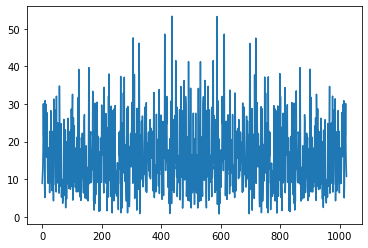

In [26]:
plt.plot((out[0].detach()**2 + out[1].detach()**2)**0.5) 


In [344]:
X_test = torch.tensor(np.array(np.random.rand(size)), dtype=torch.float)
Y_test = np.fft.fft(X_test)
out = model(X_test)
mse = (criterion(torch.tensor(Y_test.real), out[0]).item() + criterion(torch.tensor(Y_test.imag), out[1]).item()) / 2
print('mse = ', mse)

mse =  0.06789506563778716


In [346]:
X_test = torch.tensor(np.array(np.random.rand(size)-2), dtype=torch.float)
Y_test = np.fft.fft(X_test)
out = model(X_test)
mse = (criterion(torch.tensor(Y_test.real), out[0]).item() + criterion(torch.tensor(Y_test.imag), out[1]).item()) / 2
print('mse = ', mse)

mse =  0.5007125597214928


In [347]:
X_test = torch.tensor(np.array(np.random.rand(size) * 10), dtype=torch.float)
Y_test = np.fft.fft(X_test)
out = model(X_test)
mse = (criterion(torch.tensor(Y_test.real), out[0]).item() + criterion(torch.tensor(Y_test.imag), out[1]).item()) / 2
print('mse = ', mse)

mse =  6.393297490436334


## Часть 2 Power spectral density (dB)

### Подготовка данных

Используя пакетное решение, [например](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html), подготовьте обучающую выборку.

In [48]:
X, Y = [], []
for _ in range(N):
    w1, w2 = np.random.rand(), np.random.rand()
    X.append(np.array([(np.sin(w1 * t) + np.cos(w2 * t)) / 2 for t in range(1024)]))
    _, Pxx_den = periodogram(X[-1])
    Y.append(np.array(Pxx_den[1:]))
X = torch.tensor(np.array(X), dtype=torch.float)
Y = torch.tensor(np.array(Y), dtype=torch.float)

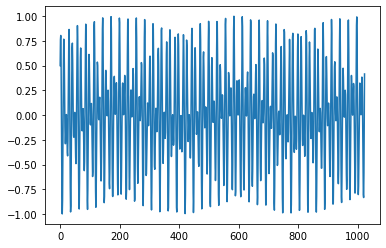

In [39]:
w1, w2 = np.random.rand(), np.random.rand()
x = np.array([(np.sin(w1 * t) + np.cos(w2 * t)) / 2 for t in range(1024)])
plt.plot(x)

### Соберите и обучите нейросеть для предсказания спектральной плотности мощности

*Подсказка: для входа 1024 выход будет 512*

In [49]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1024, 512)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return x

In [50]:
model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
epochs = 150

In [51]:
for epoch in range(epochs):
    outputs = model(X)
    loss = criterion(outputs, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))

Epoch [1/150], Loss: 43.4309
Epoch [2/150], Loss: 34.1172
Epoch [3/150], Loss: 25.0757
Epoch [4/150], Loss: 19.6429
Epoch [5/150], Loss: 16.8514
Epoch [6/150], Loss: 15.7991
Epoch [7/150], Loss: 15.7859
Epoch [8/150], Loss: 16.2867
Epoch [9/150], Loss: 16.7378
Epoch [10/150], Loss: 16.8049
Epoch [11/150], Loss: 16.4310
Epoch [12/150], Loss: 15.7337
Epoch [13/150], Loss: 14.9053
Epoch [14/150], Loss: 14.1356
Epoch [15/150], Loss: 13.5579
Epoch [16/150], Loss: 13.2313
Epoch [17/150], Loss: 13.1389
Epoch [18/150], Loss: 13.2094
Epoch [19/150], Loss: 13.3428
Epoch [20/150], Loss: 13.4442
Epoch [21/150], Loss: 13.4502
Epoch [22/150], Loss: 13.3409
Epoch [23/150], Loss: 13.1357
Epoch [24/150], Loss: 12.8828
Epoch [25/150], Loss: 12.6364
Epoch [26/150], Loss: 12.4393
Epoch [27/150], Loss: 12.3142
Epoch [28/150], Loss: 12.2588
Epoch [29/150], Loss: 12.2528
Epoch [30/150], Loss: 12.2643
Epoch [31/150], Loss: 12.2645
Epoch [32/150], Loss: 12.2354
Epoch [33/150], Loss: 12.1729
Epoch [34/150], Los

### Провалидируйте свое решение

*Примечание: Для сдачи достаточно качественного соответствия по форме спектра с пакетным решением*

In [52]:
w1, w2 = np.random.rand(), np.random.rand()
X = np.array([(np.sin(w1 * t) + np.cos(w2 * t)) / 2 for t in range(1024)])

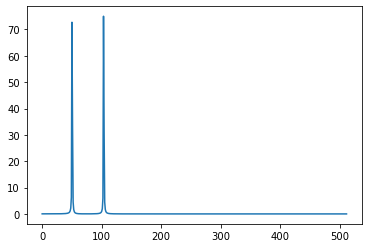

In [53]:
_, Pxx_den = periodogram(X)
plt.plot(range(len(Pxx_den[1:])), Pxx_den[1:])

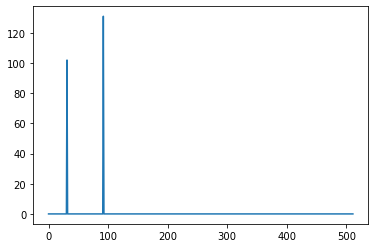

In [460]:
plt.plot(range(len(Pxx_den[1:])), model(torch.tensor(X, dtype=torch.float)).detach().numpy())